In [1]:
#Importing libraries and loading the dataset
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

C:\Users\Akkju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Akkju\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Jun 14 07:58:30 2025).


In [2]:
#Data Cleaning

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [3]:
df_us = df[df['job_country']=='United States']

In [6]:
df_skills = df_us.explode('job_skills')

df_skills[['job_skills','job_title_short']]

,job_skills,job_title_short
0,None,Senior Data Engineer
3,python,Data Engineer
3,c++,Data Engineer
3,java,Data Engineer
3,matlab,Data Engineer
...,...,...
785692,r,Data Scientist
785703,None,Data Analyst
785705,sql,Data Analyst
785705,python,Data Analyst


In [19]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name ='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [30]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[0:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

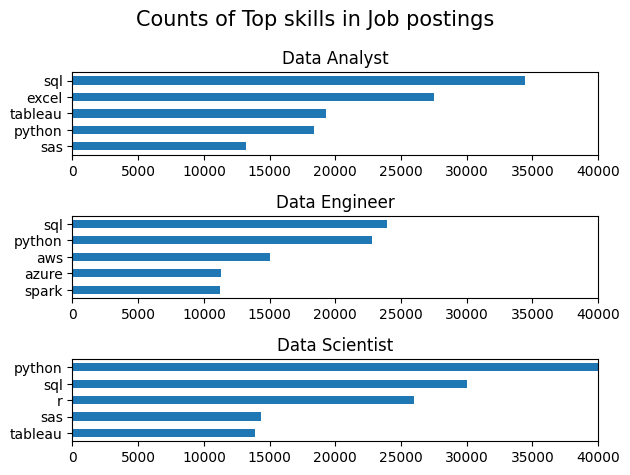

In [54]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills', y='skill_count',ax=ax[i], title =job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 40000)
    plt.tight_layout()
    plt.suptitle('Counts of Top skills in Job postings', fontsize = 15)

plt.show()

In [57]:
df_job_titles_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

In [67]:
df_skills_perc = pd.merge(df_skills_count,df_job_titles_count, how='left',on='job_title_short')
df_skills_perc['skills_percentage'] = 100* (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])

In [68]:
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


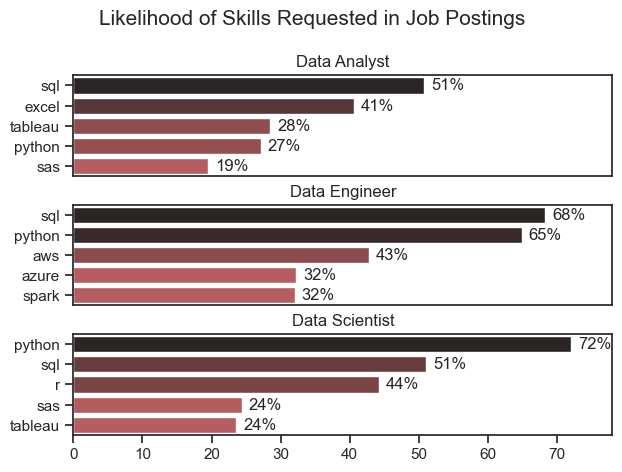

In [133]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, y='job_skills',x='skills_percentage', ax=ax[i], hue='skills_percentage', palette='dark:r_r')
    sns.set_theme(style='ticks')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skills_percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center')
        #ax[i].text(v + 1, n, f'{int(v)}%', va = 'center') # this too is possible
    
    if i != len(job_titles) -1:
        ax[i].set_xticks([])
    #ax[0].set_xticks([])
    #ax[1].set_xticks([])
    
plt.suptitle('Likelihood of Skills Requested in Job Postings', fontsize = 15)
plt.tight_layout(h_pad=0.5)
plt.show()